<h1>K Nearest Neighbors Model for Heart Disease </h1>

<b>Import Libraries </b>

In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
from sklearn.preprocessing import StandardScaler #import libraries for preprocessing dataset
from sklearn.model_selection import train_test_split#import libraries for Create Train Test dataset
from sklearn.metrics import accuracy_score #import libraries for check Accuracy
from sklearn.metrics import confusion_matrix#import libraries for create matrix
from sklearn.neighbors import KNeighborsClassifier# import libraries for K Nearest neighbors model
from sklearn.metrics import classification_report #import libraries for classification

In [47]:
import eli5
from eli5.sklearn import PermutationImportance

In [48]:
import shap

In [49]:
import warnings
warnings.filterwarnings('ignore')

<b>Import CSV file</b>

In here I import heart.csv file as a dataset. It is a one of real-time dataset of the kaggle.

In [50]:
heartData = pd.read_csv('heart.csv')

In [51]:
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<b>Rename columns in CSV file</b>

In [52]:
heartData = heartData.rename(columns={"cp": "ChestPain", "trestbps": "BloodPressure", "fbs": "BloodSugar", "ca": "Vessels", "chol": "Cholesterol"})

In [53]:
heartData.describe()

,age,sex,ChestPain,BloodPressure,Cholesterol,BloodSugar,restecg,thalach,exang,oldpeak,slope,Vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<b>Standardize features</b>

In [54]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'BloodPressure', 'Cholesterol', 'thalach', 'oldpeak']
heartData[columns_to_scale] = standardScaler.fit_transform(heartData[columns_to_scale])#data fit and transfroming

<b>Convert categorical variable into dummy/indicator variables</b>

In [55]:
heartData = pd.get_dummies(heartData, columns = ['sex', 'ChestPain', 'BloodSugar', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

<b>Features and target labels to be kept separate (healthy or sick)</b>

In [56]:
labels = heartData['target']
features = heartData.drop(['target'], axis = 1)

Create two sets of features and target labels: one for training and one for testing.

In [57]:
features_train , features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2, random_state=42)

<b>Show datasets</b>

In [58]:
heartData

,age,BloodPressure,Cholesterol,thalach,oldpeak,Vessels,target,sex_1,ChestPain_1,ChestPain_2,ChestPain_3,BloodSugar_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


In [59]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [60]:
len(features_train)

242

In [61]:
features_train

,age,BloodPressure,Cholesterol,thalach,oldpeak,Vessels,sex_1,ChestPain_1,ChestPain_2,ChestPain_3,BloodSugar_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
132,-1.363869,-0.663867,0.941846,0.540209,-0.896862,0,1,1,0,0,0,1,0,0,0,1,0,1,0
202,0.400752,1.049520,0.458709,-1.690047,-0.206705,0,1,0,0,0,0,0,0,1,0,1,0,0,1
196,-0.922713,1.049520,-0.294985,-0.115749,2.208842,0,1,0,1,0,0,1,0,0,1,0,0,1,0
75,0.069886,0.192827,0.072199,0.496478,0.310912,0,0,1,0,0,0,0,0,0,1,0,0,1,0
176,0.621330,-0.835206,-0.314310,0.452748,0.310912,2,1,0,0,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.481558,0.478391,-0.256334,0.583939,-0.379244,1,1,0,1,0,0,1,0,0,1,0,0,0,1
71,-0.371269,-2.148802,-0.372287,0.190365,-0.896862,1,1,0,1,0,0,1,0,1,0,1,0,0,1
106,1.613930,1.620649,-0.237008,-0.815437,-0.810592,1,1,0,0,1,1,0,0,0,1,0,0,1,0
270,-0.922713,-0.663867,0.052874,-0.246940,-0.206705,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [62]:
len(features_test)

61

In [63]:
features_test

,age,BloodPressure,Cholesterol,thalach,oldpeak,Vessels,sex_1,ChestPain_1,ChestPain_2,ChestPain_3,BloodSugar_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
179,0.290464,1.049520,0.574662,-1.646316,-0.379244,1,1,0,0,0,0,0,0,1,1,0,1,0,0
228,0.511041,2.191778,0.806568,0.409017,-0.724323,0,1,0,0,1,0,0,0,0,1,0,0,0,1
111,0.290464,1.049520,-2.324160,1.021244,-0.724323,1,1,0,1,0,1,1,0,0,0,1,0,0,1
246,0.180175,0.135714,3.144951,0.015443,0.742260,2,0,0,0,0,0,0,0,1,1,0,0,0,1
60,1.834507,-1.234996,0.362082,-0.859167,-0.896862,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,1.613930,0.478391,0.149501,-0.159479,0.828529,3,1,0,1,0,0,0,0,0,1,0,0,0,1
104,-0.481558,-0.149851,-0.971377,0.583939,-0.896862,0,1,0,1,0,0,1,0,0,0,1,0,1,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,2,1,0,0,0,1,1,0,0,1,0,0,0,1
193,0.621330,0.763956,0.690615,-0.334401,1.518686,2,1,0,0,0,0,0,0,1,1,0,0,0,1


<h1>Create Model (K Nearest Neighbors)</h1>

<b>Find Accuracy of the model</b>

In [64]:
knn = KNeighborsClassifier(n_neighbors = 11) # model train
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)

score = round(knn.score(features_test, labels_test), 3) *100
print(f" Accuracy of the K Nearest Neighbors model is {score}%")#print accuracy score

 Accuracy of the K Nearest Neighbors model is 82.0%


<b>Find the optimal k value </b>

Max K Nearest Neighbors Accuracy score is 90.16%
Best K value is 23


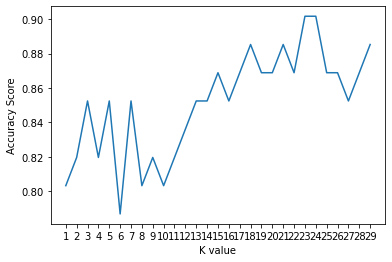

In [65]:
accuracy_scores = []

for x in range(1,30):
    knn_2 = KNeighborsClassifier(n_neighbors = x)
    knn_2.fit(features_train, labels_train)
    accuracy_scores.append(knn_2.score(features_test, labels_test))
    
# create & show graph
sns.lineplot(range(1,30), accuracy_scores)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Accuracy Score")


best_Kvalues = accuracy_scores.index(max(accuracy_scores)) + 1#find best K values
m_score = round((max(accuracy_scores) * 100), 2) #find maximum accuracy score

print(f"Max K Nearest Neighbors Accuracy score is {m_score}%")
print(f"Best K value is {best_Kvalues}")